In [23]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = df.drop('label', axis=1)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00       

In [25]:
import pandas as pd

# Custom soil/environment input
sample_data = [[90, 42, 43, 20.5, 82, 6.5, 202]]  # N, P, K, temp, humidity, pH, rainfall
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
sample_df = pd.DataFrame(sample_data, columns=feature_names)

# Predict
predicted_crop = model.predict(sample_df)[0]
print("🌾 Recommended Crop:", predicted_crop)

🌾 Recommended Crop: rice


🌾 Recommended Crop: apple
Attempting to generate plot...


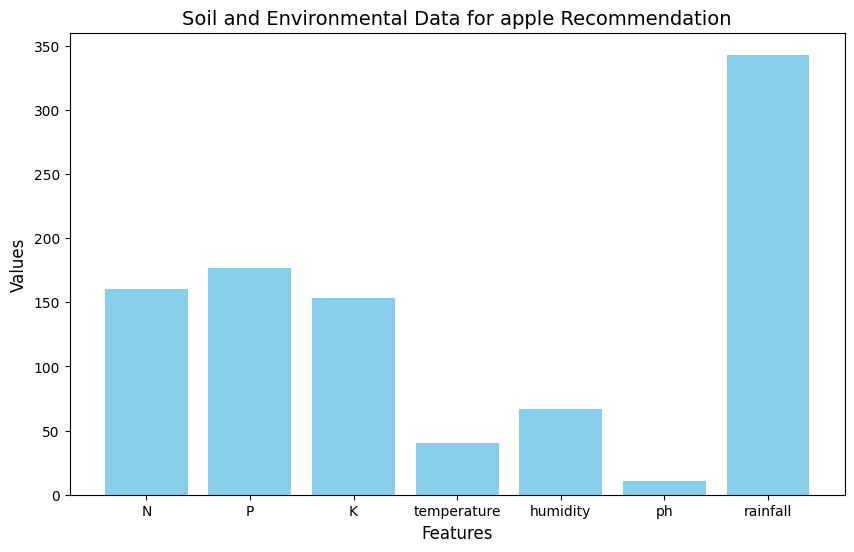

Plot generation attempted.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from ipywidgets import interact, widgets, VBox, Output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = df.drop('label', axis=1)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Function to predict crop based on input features
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    print("recommend_crop function called!")
    # Create the input DataFrame
    sample_data = [[N, P, K, temperature, humidity, ph, rainfall]]
    feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    sample_df = pd.DataFrame(sample_data, columns=feature_names)

    # Predict the crop
    predicted_crop = model.predict(sample_df)[0]

    # Display recommendation and plot the input data
    out.clear_output()
    with out:
        print(f"🌾 Recommended Crop: {predicted_crop}")
        print("Attempting to generate plot...")
        # Plotting the input data as a bar chart
        fig, ax = plt.subplots(figsize=(10,6))
        ax.bar(sample_df.columns, sample_df.iloc[0], color='skyblue')
        ax.set_title(f'Soil and Environmental Data for {predicted_crop} Recommendation', fontsize=14)
        ax.set_xlabel('Features', fontsize=12)
        ax.set_ylabel('Values', fontsize=12)
        plt.show()
        print("Plot generation attempted.")
        # plt.close(fig) # Temporarily removed


# Create widgets for input
N = widgets.FloatSlider(value=90, min=0, max=200, step=1, description='Nitrogen (N):')
P = widgets.FloatSlider(value=42, min=0, max=200, step=1, description='Phosphorus (P):')
K = widgets.FloatSlider(value=43, min=0, max=200, step=1, description='Potassium (K):')
temperature = widgets.FloatSlider(value=20.5, min=0, max=50, step=0.1, description='Temperature (°C):')
humidity = widgets.FloatSlider(value=82, min=0, max=100, step=1, description='Humidity (%):')
ph = widgets.FloatSlider(value=6.5, min=0, max=14, step=0.1, description='pH Level:')
rainfall = widgets.FloatSlider(value=202, min=0, max=500, step=1, description='Rainfall (mm):')

# Create a button to run the prediction
button = widgets.Button(description="Get Crop Recommendation")

# Create an output widget
out = Output()

# Function to be called when button is clicked
def on_button_click(b):
    print("Button clicked!")
    recommend_crop(N.value, P.value, K.value, temperature.value, humidity.value, ph.value, rainfall.value)

# Link button click to the function
button.on_click(on_button_click)

# Arrange widgets in a vertical box
input_widgets = VBox([N, P, K, temperature, humidity, ph, rainfall, button])

# Display widgets and output
display(input_widgets, out)

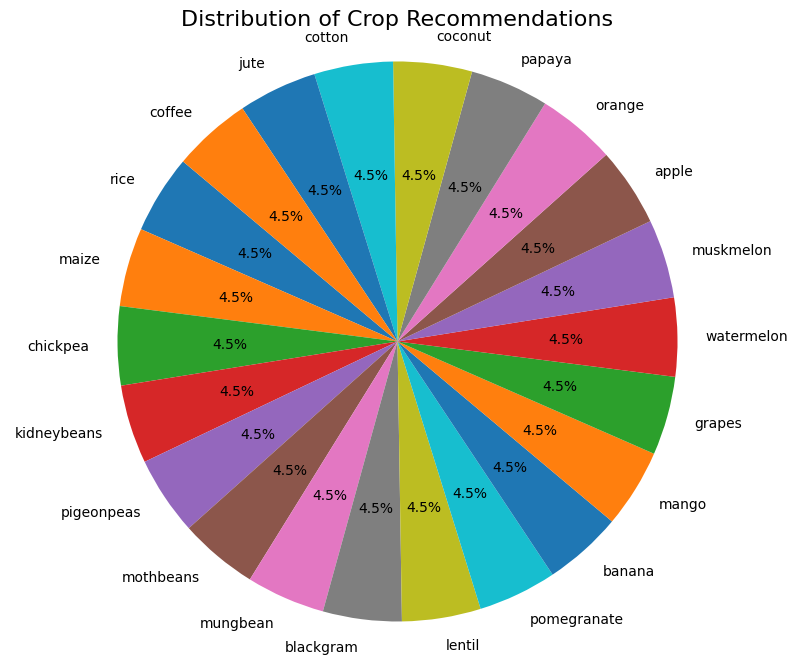

In [27]:
# Get the counts of each crop label
crop_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crop Recommendations', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

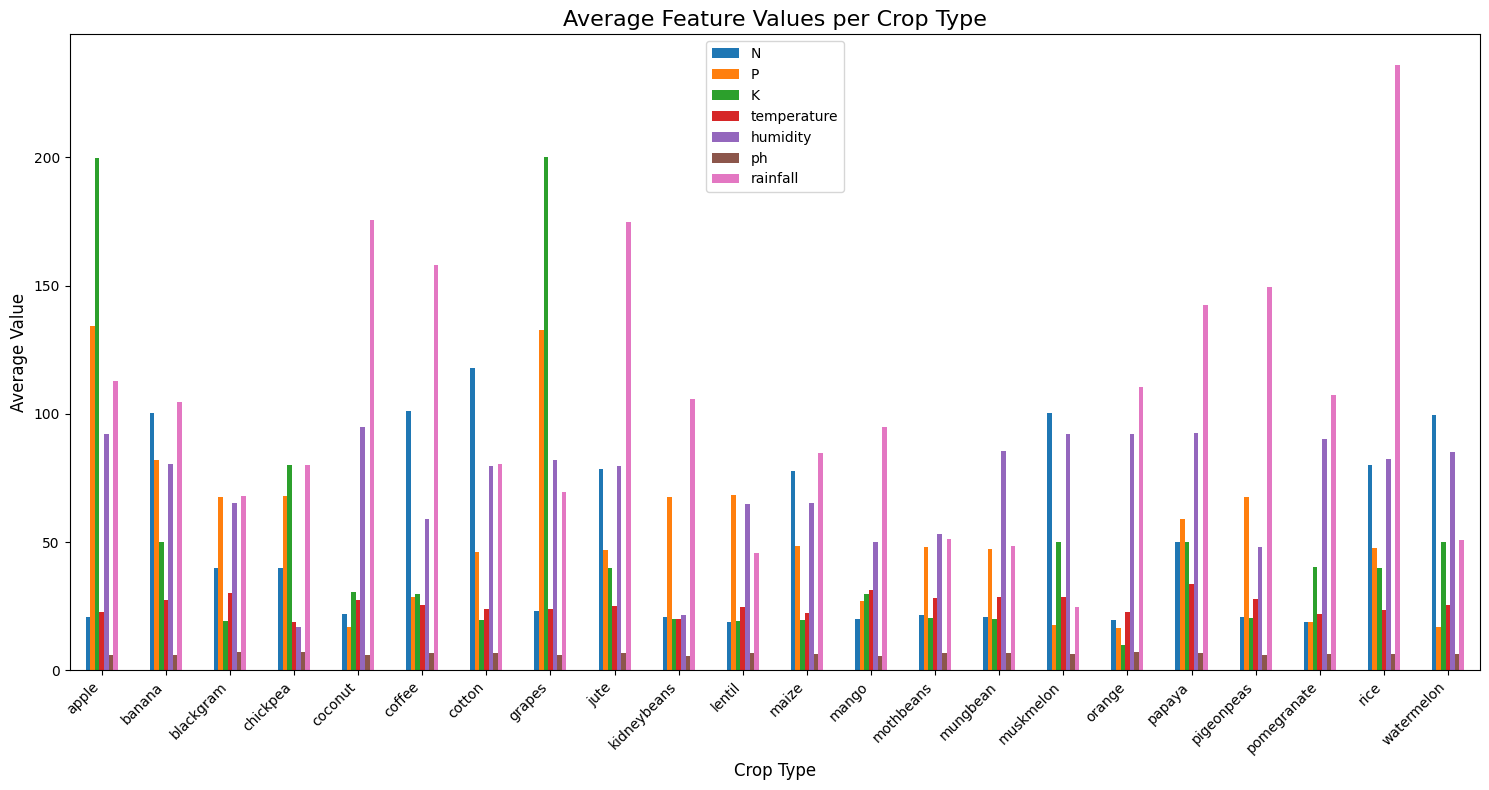

In [28]:
# Calculate the average values of each feature for each crop type
average_features = df.groupby('label').agg({
    'N': 'mean',
    'P': 'mean',
    'K': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'ph': 'mean',
    'rainfall': 'mean'
}).reset_index()

# Set the crop label as the index for easier plotting
average_features = average_features.set_index('label')

# Plotting the grouped bar chart
average_features.plot(kind='bar', figsize=(15, 8))
plt.title('Average Feature Values per Crop Type', fontsize=16)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

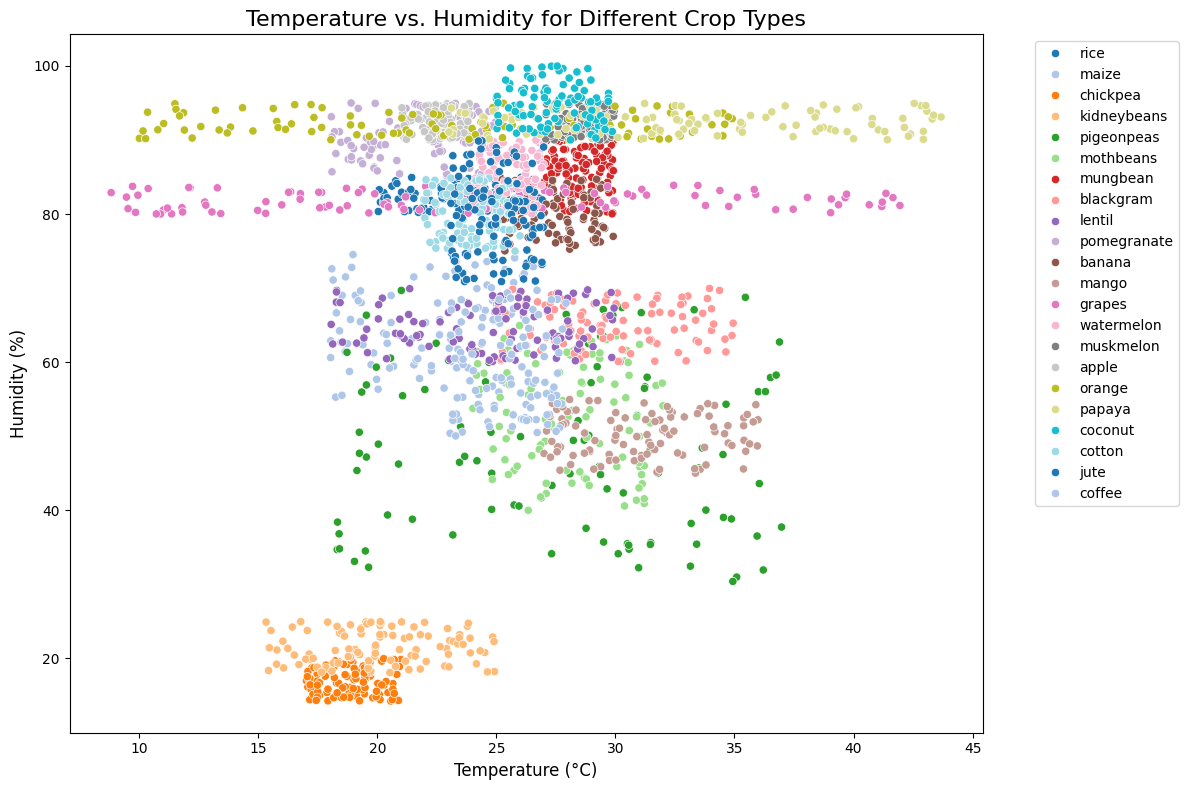

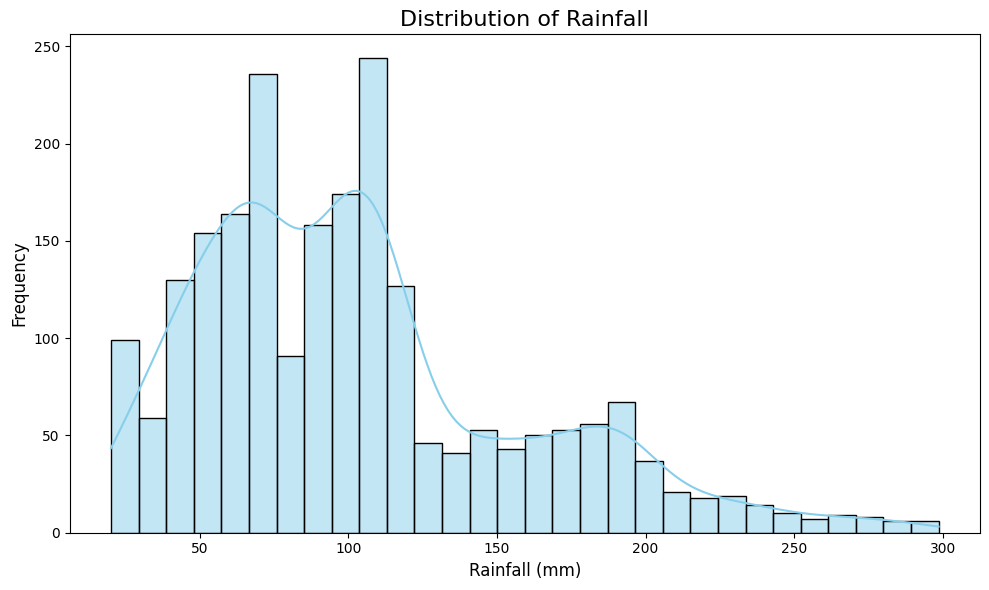

/tmp/ipython-input-29-2510315878.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='ph', palette='tab20')


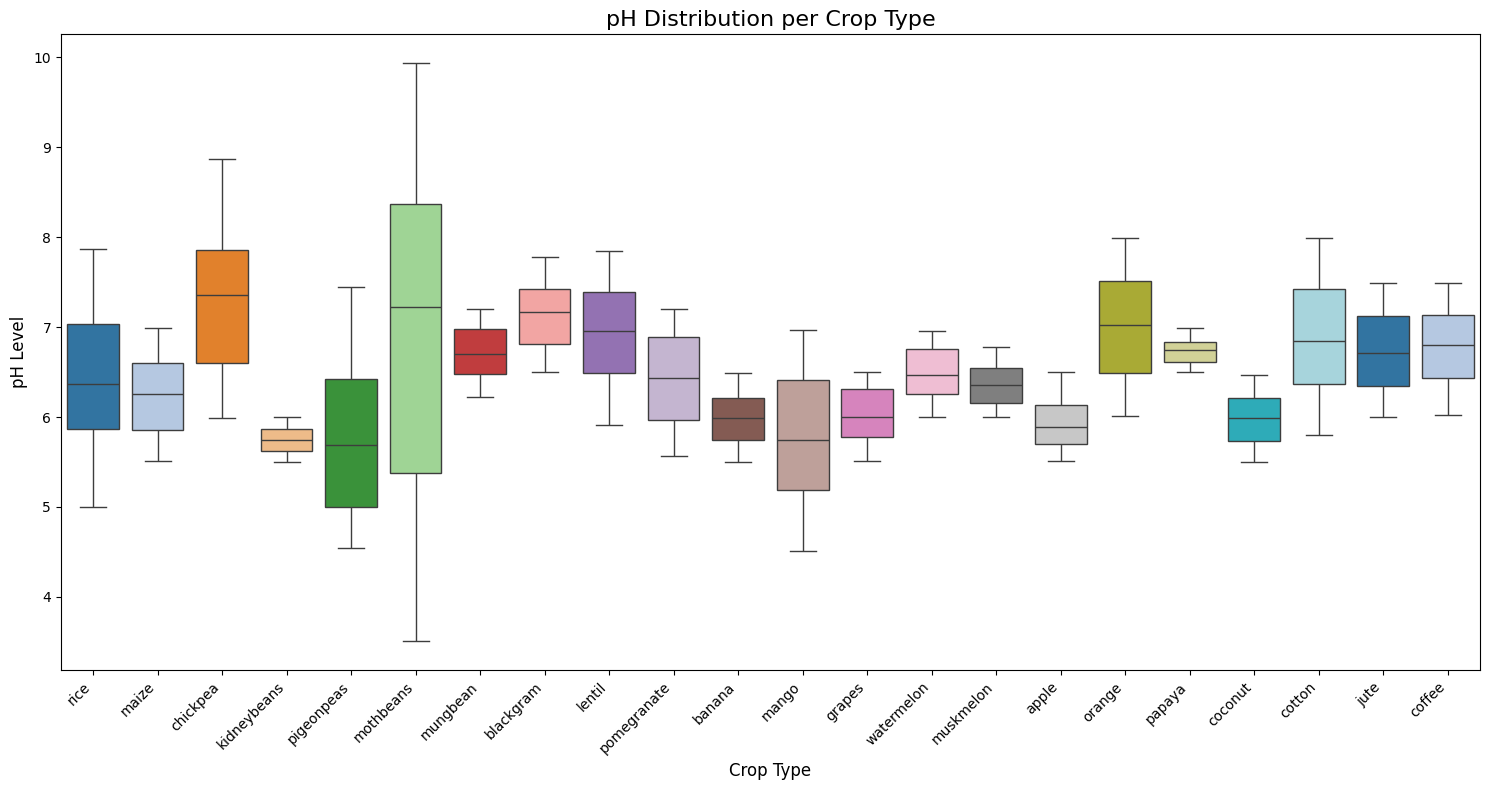

In [29]:
import seaborn as sns

# Scatter plot of Temperature vs. Humidity, colored by crop label
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', palette='tab20')
plt.title('Temperature vs. Humidity for Different Crop Types', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Distribution of Rainfall
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rainfall', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Rainfall', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Box plot of pH for each crop type
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='label', y='ph', palette='tab20')
plt.title('pH Distribution per Crop Type', fontsize=16)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('pH Level', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
from ipywidgets import interact, Dropdown, Output, VBox
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the list of numerical features
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create dropdown widgets for selecting features
x_feature_dropdown = Dropdown(options=feature_columns, description='X-axis Feature:')
y_feature_dropdown = Dropdown(options=feature_columns, description='Y-axis Feature:')

# Create an output widget to display the plot
plot_output = Output()

# Function to update the plot based on selected features
def update_plot(x_feature, y_feature):
    with plot_output:
        plot_output.clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=x_feature, y=y_feature, hue='label', palette='tab20')
        plt.title(f'{y_feature} vs. {x_feature} for Different Crop Types', fontsize=16)
        plt.xlabel(x_feature, fontsize=12)
        plt.ylabel(y_feature, fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Link the dropdowns to the update function
interact(update_plot, x_feature=x_feature_dropdown, y_feature=y_feature_dropdown);

# Display the widgets and the output area
display(VBox([x_feature_dropdown, y_feature_dropdown, plot_output]))

interactive(children=(Dropdown(description='X-axis Feature:', options=('N', 'P', 'K', 'temperature', 'humidity…